# <font color = Blue > Titanic: Compare Support Vector Machine to a 3 layer Neural Network  <font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

****Data****
 * Survived: Survival (0 = No, 1 = Yes)
 * PassengerId: Id given to each traveler on the boat
 * Pclass: Ticket class. It has three possible values: 1,2,3 (first, second and third class)
 * Sex
 * Age
 * Sibsp : number of siblings and spouses traveling with the passenger
 * Parch : number of parents and children traveling with the passenger
 * Ticket: Ticket number	
 * Fare  : Passenger fare
 * Fabin : Cabin number
 * Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Total number of passenger is 891 and onle Age of **714** people is given 

In [9]:
train.describe(include =['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Saundercock, Mr. William Henry",male,1601,G6,S
freq,1,577,7,4,644


* Total number of Passenger is 891, out of them 577 are male.<br>
* There are duplicate ticket number<br>
* Some cabins are shared with  more than one person.

In [10]:
# train.describe(include ='all')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ticket feature may not be a correlation with survival. It contains 210 duplicates values. we may *drop ticket feature*<br>
Cabin feature may be dropped as it is *highly incomplete* or contains many null values in training.<br>
PassengerId may be dropped from training dataset *we need it during submission of project on kaggle*.<br>
Name feature is relatively non-standard, *may not contribute directly to survival*, so maybe dropped.<br>
Age of 177 people is not givenn

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


## Relationship between feature and survival 

In [14]:
PassengerId_train = train['PassengerId']
# train.drop('PassengerId', axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train['non_survived'] = 1-train['Survived']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Pclass Vs Survived

In [16]:
# train.groupby(by= 'Pclass').count()

In [17]:
# train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= False).mean()\
#                                             .sort_values(by ='Survived', ascending = False)
# train.groupby(['Pclass'], as_index= False).Survived.mean().sort_values(by ='Survived', ascending = False)

In [18]:
pd.DataFrame({'Number of people':train.groupby('Pclass').Survived.count(), 'Survived':train.groupby('Pclass').Survived.sum(), \
              'Mean':train.groupby('Pclass').Survived.mean()})

,Number of people,Survived,Mean
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [19]:
train.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [20]:
# train.groupby('Pclass').Survived.sum()

In [21]:
print(train.Survived.sum())
print(train.Survived.mean())

342
0.3838383838383838


#### Almost 38.38% i.e 342 people survived out of 891 poeple

In [22]:
train.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

C:\Users\04rit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


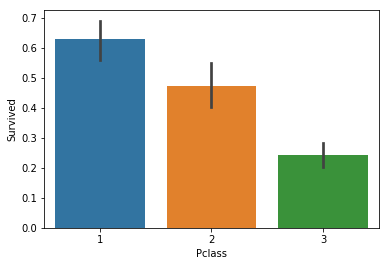

In [23]:
sns.barplot(x='Pclass', y= 'Survived', data = train)

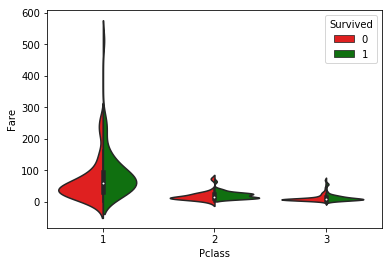

In [24]:
sns.violinplot(x= 'Pclass', y= 'Fare' , hue = 'Survived', data = train, split = True,palette={0: "r", 1: "g"})

In [25]:
# train.groupby('Pclass').Survived.mean().plot(kind = 'bar', )


Average fare of *Pclass 1* is high and also more people has survival chance from this class(136 people (63%)survived out of 216 people from Pclass 1 )<br>
87 people (47%) survived out of 184 people from Pclass 2 <br>
119 people (24%) survived out of 419 people from Pclass 3

### Sex Vs Survived

In [26]:
# train.groupby('Sex', as_index = False).Survived.mean()

In [27]:
# train.groupby(by= 'Sex', as_index = False).Survived.sum()

In [28]:
# train.groupby('Sex').size()

In [29]:
pd.DataFrame({'Number of people':train.groupby('Sex').Survived.count(), 'Survived':train.groupby('Sex').Survived.sum(), \
              'Mean':train.groupby('Sex').Survived.mean()})

,Number of people,Survived,Mean
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


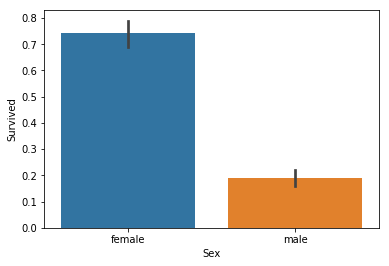

In [30]:
sns.barplot(x= 'Sex', y='Survived', data = train, order = ['female', 'male'])

In [31]:
# train.groupby('Sex').Survived.mean().plot(kind= 'bar')

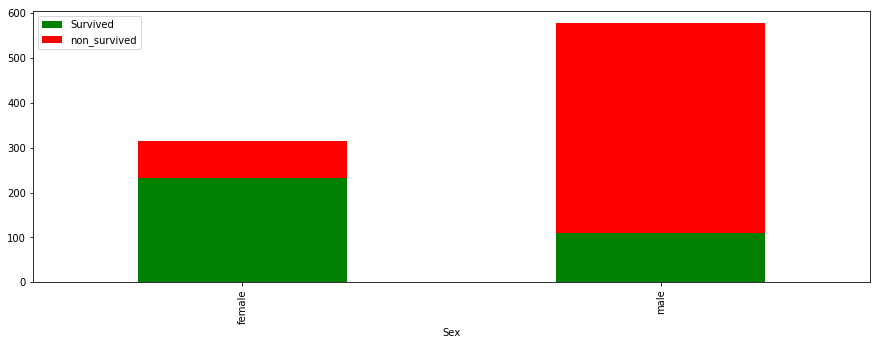

In [32]:
train.groupby('Sex').sum()[['Survived', 'non_survived']].plot(kind = 'bar', stacked = True, figsize = (15, 5),\
                                                              color = ['g', 'r'])

###### 233 female (74.2%) survived out of 314 female while only 109 male (18.8%) survived out of 577

### Sex and Pclass Vs Survived

In [33]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [34]:
# tab1 = pd.crosstab(train['Survived'], train['Pclass'])
# tab1

In [35]:
# train.groupby(by = ['Sex', 'Pclass'], as_index = False)['Survived'].sum()

In [36]:
pd.DataFrame({'Number of people':train.groupby(by = ['Sex', 'Pclass']).Survived.count(), 'Survived':train.groupby(by = ['Sex', 'Pclass']).Survived.sum(), \
              'Mean':train.groupby(by = ['Sex', 'Pclass']).Survived.mean()})

Number of people  Survived      Mean
Sex    Pclass                                      
female 1                     94        91  0.968085
       2                     76        70  0.921053
       3                    144        72  0.500000
male   1                    122        45  0.368852
       2                    108        17  0.157407
       3                    347        47  0.135447

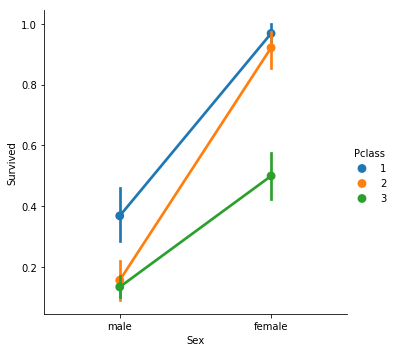

In [37]:
sns.catplot(kind= 'point', x='Sex',y='Survived', hue = 'Pclass', data = train)

Women from 1st and 2nd Pclass has more than 90% survival chance<br>
Men from Pclass 1 are more  survival chance and from class 2nd and 3rd have only around 10% survival chance

### Age Vs Survival chance

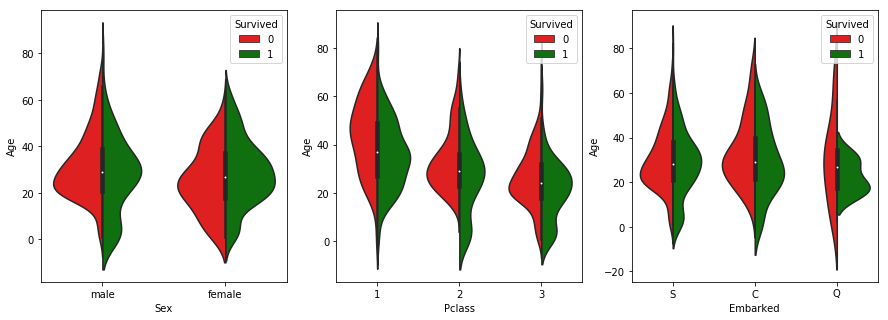

In [38]:
fig= plt.figure(figsize = (15,5))
ax1 =fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3= fig.add_subplot(133)
sns.violinplot(x= 'Sex', y= 'Age' , hue = 'Survived', data = train, split = True, ax= ax1, palette={0: "r", 1: "g"})
sns.violinplot(x= 'Pclass', y= 'Age' , hue = 'Survived', data = train, split = True, ax= ax2, palette={0: "r", 1: "g"})
sns.violinplot(x= 'Embarked', y= 'Age' , hue = 'Survived', data = train, split = True, ax= ax3, palette={0: "r", 1: "g"})

Younger male of age range 5year - 10year tend to survive as depicted by green historam
male of age range 20year-40year has more tend to die.
Women survive more than men, as depicted by the larger female green histogram

### Parch Vs Survival

In [39]:
# train.groupby('Parch').mean()

In [40]:
pd.DataFrame({'Number of people':train.groupby('Parch').Survived.count(), 'Survived':train.groupby('Parch').Survived.sum(), \
              'Mean':train.groupby('Parch').Survived.mean()})

,Number of people,Survived,Mean
Parch,,,
0,678,233,0.343658
1,118,65,0.550847
2,80,40,0.500000
3,5,3,0.600000
4,4,0,0.000000
5,5,1,0.200000
6,1,0,0.000000


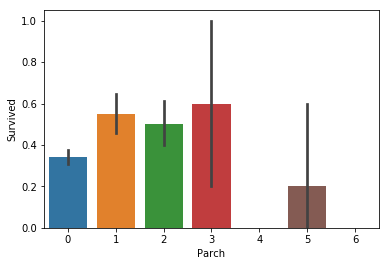

In [41]:
sns.barplot(x= 'Parch', y= 'Survived', data = train)

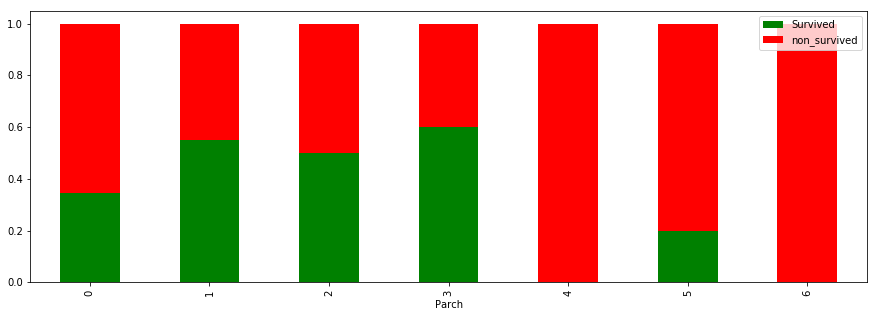

In [42]:
train.groupby('Parch')[['Survived','non_survived']].mean().plot(kind= 'bar', stacked = True, color = ('g', 'r'), figsize = (15,5))

### Embarked Vs Survival

In [43]:
# train.Embarked.unique()

In [44]:
# train.groupby('Embarked').Survived.count()

In [45]:
pd.DataFrame({'Number of people':train.groupby('Embarked').Survived.count(), 'Survived':train.groupby('Embarked').Survived.sum(), \
              'Mean':train.groupby('Embarked').Survived.mean()})

,Number of people,Survived,Mean
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [46]:
# train.groupby('Embarked', as_index = False).Survived.mean()

Text(0, 0.5, 'number of people')

<Figure size 432x288 with 0 Axes>

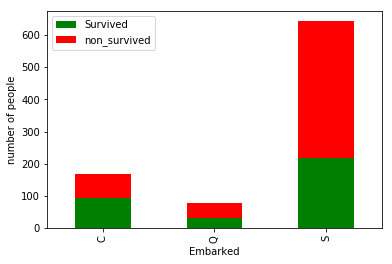

In [47]:
fig = plt.figure()
train.groupby('Embarked')['Survived', 'non_survived'].sum().plot(kind = 'bar', stacked = True, color = ('g','r'))
plt.ylabel('number of people')

More survival chance from Embarked C

### SibSp Vs Survival

In [48]:
pd.DataFrame({'Number of people':train.groupby('SibSp').Survived.count(), 'Survived':train.groupby('SibSp').Survived.sum(), \
              'Mean':train.groupby('SibSp').Survived.mean()})

,Number of people,Survived,Mean
SibSp,,,
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,16,4,0.250000
4,18,3,0.166667
5,5,0,0.000000
8,7,0,0.000000


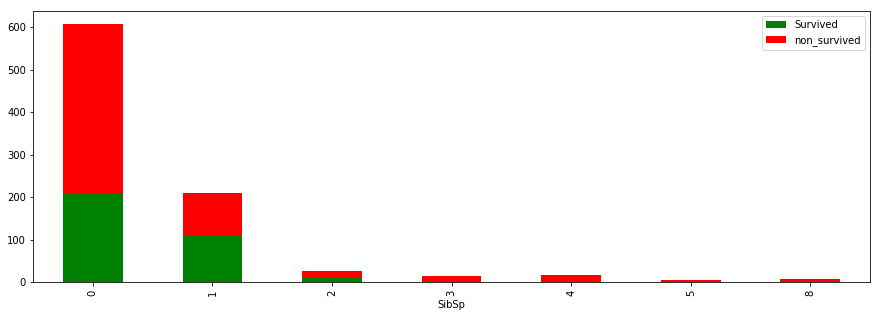

In [49]:
train.groupby('SibSp')['Survived', 'non_survived'].sum().plot(kind= 'bar', stacked = True, color = ('g','r'), figsize = (15,5))

people with less siblings has more survival chance

## Feature Extraction

select the appropriate features totrain our classifier.

Combine train and test data 

In [50]:
train_test=[train , test]
data = pd.concat(train_test, sort = False)

In [51]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0


In [52]:
data.shape

(1309, 13)

In [53]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0


### Name 

Extract title from each name that can give additional information about the social status 

In [54]:
# title = []
# for name in data['Name']:
#     title.append(name.split(',')[1].split('.')[0])
# data['title'] = title    

In [55]:
data['title'] = data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr


In [56]:
# pd.crosstab(data['title'], data['Sex'])

In [57]:
Titles = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona": "UNK"
}

In [58]:
data['title'] = data.title.apply(lambda x: Titles[x])

In [59]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0,Mrs


In [60]:
data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', 'UNK'],
      dtype=object)

### Sex feature

In [563]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Age

In [616]:
age_mean = data['Age'].mean()

In [617]:
age_mean

29.881137667304014

In [620]:
data['Age'].fillna(age_mean , inplace = True)

### SibSp	Parch

In [627]:
data['Family_size'] = data["SibSp"]+data["Parch"] +1

In [630]:
data.groupby(by = ['Family_size'], as_index= False).Survived.mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


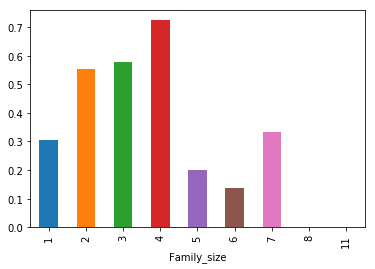

In [632]:
data.groupby(by = ['Family_size']).Survived.mean().plot(kind = 'bar')

Family size with 2, 3 and 4 member has more survival chance<br>
convert fami;y in 3 group
 * sigleton
 * smallfamily
 * largefamily

In [691]:
Family = []
for FamilySize in data['Family_size']:
    if FamilySize==1:
        Family.append(0)
    elif (2 <= FamilySize <= 4):
        Family.append(1)
    elif ( 5<=FamilySize):
        Family.append(2)


In [692]:
data["Family"] = pd.Series(Family)

In [693]:
data.drop(['SibSp', 'Parch', 'Family_size'], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,non_survived,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,NaN,S,1.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,C85,C,0.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,NaN,S,0.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,C123,S,0.0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,NaN,S,1.0,0
5,6,0.0,3,"Moran, Mr. James",0,29.881138,330877,8.4583,NaN,Q,1.0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,17463,51.8625,E46,S,1.0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,349909,21.0750,NaN,S,1.0,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,347742,11.1333,NaN,S,0.0,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,237736,30.0708,NaN,C,0.0,1


### Fare 

In [680]:
data.Fare.isnull().sum()

1

In [681]:
data['Fare'] = data['Fare'].fillna(train['Fare'].median())

In [682]:
data.Fare.isnull().sum()

0

In [696]:
data['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Mean value of Fare is  aprox. 33 and 75% of fare is 31.2 <br>
convert fare in group
 * fare <=7.89
 * 7.89< fare<= 14.5
 * 14.5< fare <= 31
 * 31< fare

In [704]:
data['Fare'].dtype

dtype('float64')

In [705]:
fare = []
for fares in data['Fare']:
    if fares<=7.89:
        fare.append(0)
    elif (7.89 <= fares <= 14.5):
        fare.append(1)
    elif ( 14.5< fares<=31):
        fare.append(2)
    elif (31<=fares):
        fare.append(3)
   

In [709]:
data['Fare_data'] = pd.Series(fare)

In [711]:
data.drop('Fare', axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,non_survived,Family_size,Family,Fare_data
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,NaN,S,1.0,2,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,C85,C,0.0,2,1,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,NaN,S,0.0,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,C123,S,0.0,2,1,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,NaN,S,1.0,1,0,1
5,6,0.0,3,"Moran, Mr. James",0,29.881138,0,0,330877,NaN,Q,1.0,1,0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,E46,S,1.0,1,0,3
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,NaN,S,1.0,5,2,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,NaN,S,0.0,3,1,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,NaN,C,0.0,2,1,2


### Embarked

In [713]:
data.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [714]:
data.Embarked.isnull().sum()

2

In [718]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Fill 2 null Embarked value with most frequent valu **S** 

In [717]:
data['Embarked'].fillna('S', inplace = True)

In [720]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [721]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,Family_size,Family,Fare_data
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1.0,2,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1,0.0,2,1,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,0.0,2,1,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,1.0,1,0,1
5,6,0.0,3,"Moran, Mr. James",0,29.881138,0,0,330877,8.4583,NaN,2,1.0,1,0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,0,1.0,1,0,3
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,0,1.0,5,2,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,0,0.0,3,1,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,1,0.0,2,1,2


## Feature selections

In [734]:
train_feature = data[:891]

In [735]:
test_feature = data[891:]

In [744]:
train_feature['Survived'].isnull().sum()

0

In [730]:
test_feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,Family_size,Family,Fare_data
0,892,NaN,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,2,NaN,1,1,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,0,NaN,2,1,3
2,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,2,NaN,1,0,1
3,895,NaN,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,0,NaN,1,1,3
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,0,NaN,3,0,1
5,897,NaN,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,0,NaN,1,0,1
6,898,NaN,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,2,NaN,1,0,3
7,899,NaN,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,0,NaN,3,2,2
8,900,NaN,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,1,NaN,1,1,1
9,901,NaN,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,0,NaN,3,1,2


In [729]:
test.shape

(418, 11)

In [745]:
feature = ['Pclass', 'Sex', 'Age', 'Fare_data','Embarked','Family', 'title' ]
train_X = train_feature[feature]
train_y = train_feature['Survived']

In [746]:
train_X.head()

,Pclass,Sex,Age,Fare_data,Embarked,Family,title
0,3,0,22.0,0,0,1,Mr
1,1,1,38.0,3,1,1,Mrs
2,3,1,26.0,1,0,0,Miss
3,1,1,35.0,3,0,1,Mrs
4,3,0,35.0,1,0,0,Mr


In [747]:
train_y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [748]:
test_x = test_feature[feature]

In [750]:
test_x.head()

,Pclass,Sex,Age,Fare_data,Embarked,Family,title
0,3,0,34.5,0,2,1,Mr
1,3,1,47.0,3,0,1,Mrs
2,2,0,62.0,1,2,0,Mr
3,3,0,27.0,3,0,1,Mr
4,3,1,22.0,1,0,0,Mrs
